# Problem Statment

### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

### Which variables are significant in predicting the demand for shared bikes.
### How well those variables describe the bike demands
### Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Importing EDA and ML Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

# Reading and Understanding Data

In [2]:
# Reading the csv file having data
bs_data=pd.read_csv(r'day.csv')

In [3]:
# checking on first 5 columns
bs_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking on numeric columns and range of values
bs_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#the casual+registered=cnt. Here cnt is the dependent variable. we can drop casual and resgistered column 
# because we dont want to analyse or build model on them separately
bs_data=bs_data.drop(['casual','registered'],axis=1)

In [6]:
# from column temp to atemp. the atemp column is more useful. so we can drop temp column
bs_data=bs_data.drop('temp',axis=1)

In [7]:
# checking total number of columns and rows
bs_data.shape

(730, 13)

In [8]:
# checking data type of each column and also looking for missing values if any
bs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 74.3+ KB


In [9]:
# no missing value in any column. All are int or float values except dteday is string

In [10]:
#checking number of unique values in data colmns
for i in bs_data.columns:
    print(i,bs_data[i].nunique())

instant 730
dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
atemp 689
hum 594
windspeed 649
cnt 695


In [11]:
#we can drop instant and dteday because both are unique for each row. From date we have already year, month and weekday information.
bs_data=bs_data.drop(['instant','dteday'],axis=1)

#### We can see season column has 4 level of values, mnth has 12, weekday has 7, weathersit has 3. The columns yr,holiday, workingday are having 2 level of values. So we have to create dummy variables out of the categorical columns in which level has more that 2.

<Figure size 1440x864 with 0 Axes>

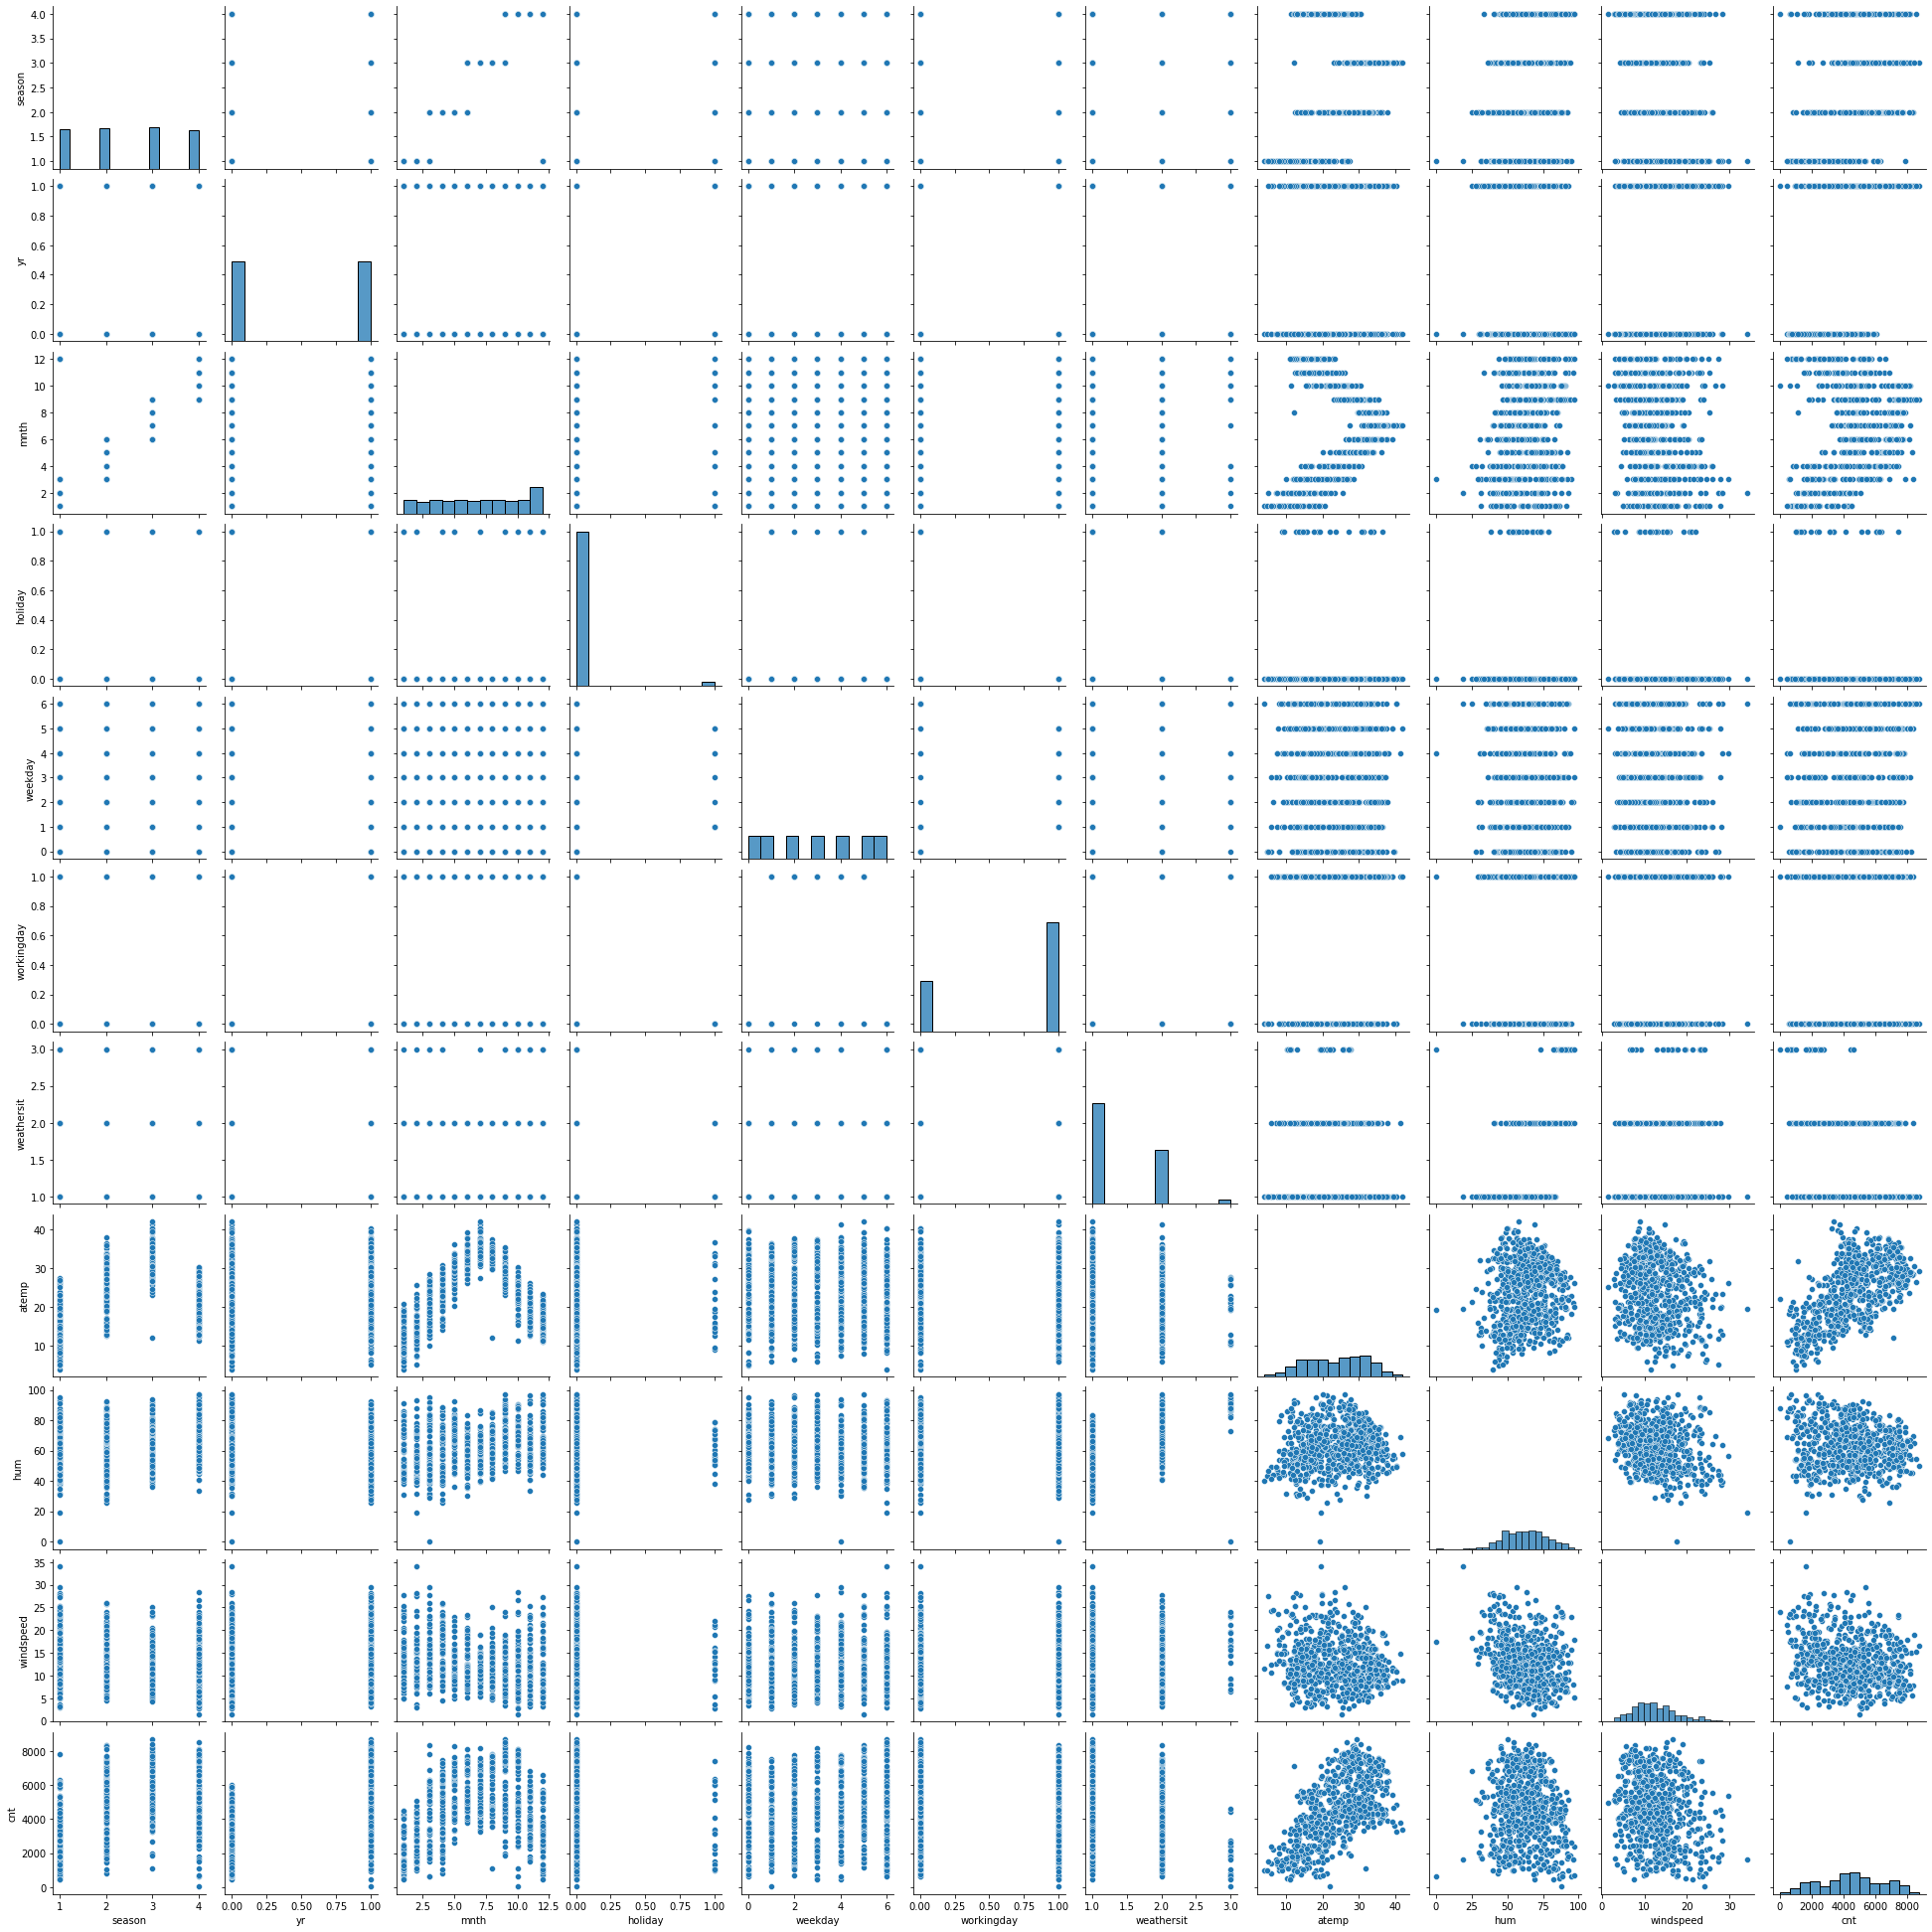

In [12]:
#seeing the relationship of various numeric columns with cnt variable
plt.figure(figsize=[20,12])
sns.pairplot(bs_data)

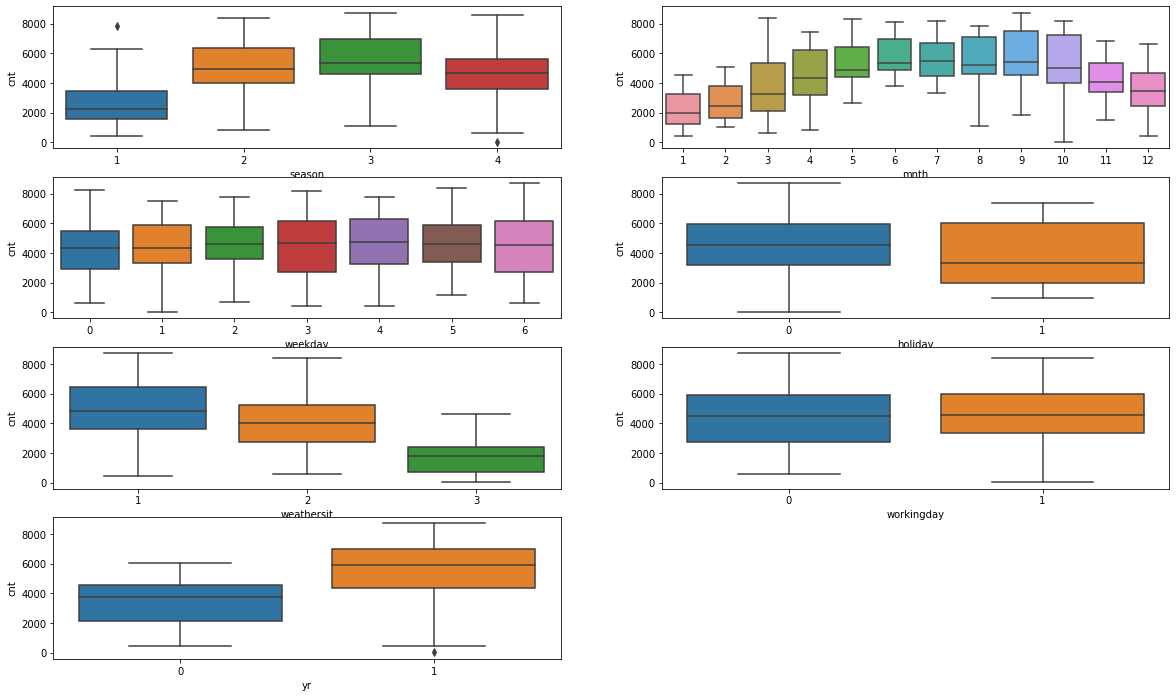

In [13]:
#analysing the box plot on cnt for each categorical columns
plt.figure(figsize=[20,12])
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=bs_data)
plt.subplot(4,2,2)
sns.boxplot(x='mnth',y='cnt',data=bs_data)
plt.subplot(4,2,3)
sns.boxplot(x='weekday',y='cnt',data=bs_data)
plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt',data=bs_data)
plt.subplot(4,2,5)
sns.boxplot(x='weathersit',y='cnt',data=bs_data)
plt.subplot(4,2,6)
sns.boxplot(x='workingday',y='cnt',data=bs_data)
plt.subplot(4,2,7)
sns.boxplot(x='yr',y='cnt',data=bs_data)
plt.show()

1.	Yr: in 2019 the demand for shared bike is more than 2018.
2.	Workingday:- The data for working day is more than that of not working day. The mean is same for cnt weather it is working day or not.
3.	Weathersit:- The demand for bikes decreased as the weather become bad.
4.	Holiday:- During holidays we have minimum demand and when there are no holidays then demand is higher. The mean for non-holiday is higher than holiday one.
5.	Weekday:- The 25th percentile and 75th percentile differs for each day but the mean is same across all weekdays. The demand increase as we move ahead in a week except on 5th day of week.
6.	Season:- Spring has the lowest demand for bikes as compared to other seasons and fall has the highest.
7.	Month:- From Jan to Oct the demand for shared bikes increases. And from Nov to Jan the demand decreases.


<AxesSubplot:>

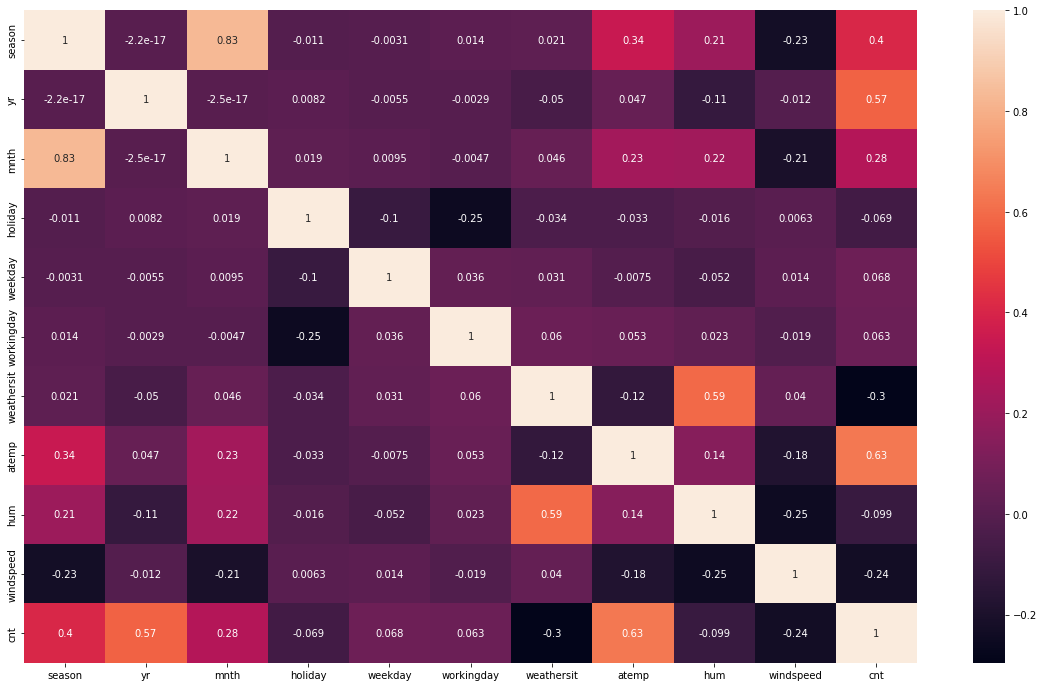

In [14]:
#checking the correlation with columns in heatmap
plt.figure(figsize=[20,12])
sns.heatmap(bs_data.corr(),annot=True)

## From the correlation heatmap, cnt is highly correlated with atemp , yr, season and month.
## While in the pairplot we have observed a good relationship of cnt with atemp, hum and windspeed.

### Start analysing categorical columns and creating dummy variables.

<AxesSubplot:>

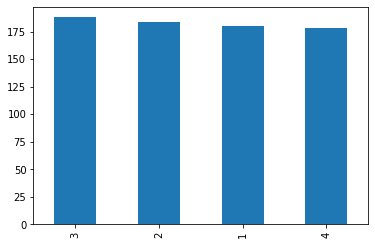

In [15]:
#lets pick season column first. Checking distribution of data in each category of season
bs_data.season.value_counts().plot(kind='bar')

In [16]:
#converting the numbers into categorical values
bs_data['season']=bs_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
#creating dummy columns for season values
seasons=pd.get_dummies(bs_data['season'],drop_first=True)
seasons

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [18]:
# merging new dataframe seasons with bs_data season column
bs_data=pd.concat([bs_data,seasons],axis=1)
bs_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,1,0,0


In [19]:
# dropping column season, as we have dummy columns from season now
bs_data=bs_data.drop('season',axis=1)

In [20]:
bs_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,1,0,0


<AxesSubplot:>

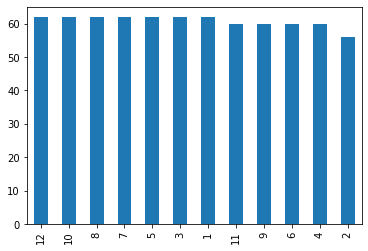

In [21]:
#checking distribution of data in each month
bs_data.mnth.value_counts().plot(kind='bar')

In [22]:
#converting the numbers into categorical values
bs_data['mnth']=bs_data['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [23]:
#creating dummy columns for mnth values,then merging new datafram mnths with bs_data season column and dropping mnth column
mnths=pd.get_dummies(bs_data['mnth'],drop_first=True)
bs_data=pd.concat([bs_data,mnths],axis=1)
bs_data=bs_data.drop('mnth',axis=1)
bs_data.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,6,0,2,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,2,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,1,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,1,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,1,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [24]:
bs_data.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

<AxesSubplot:>

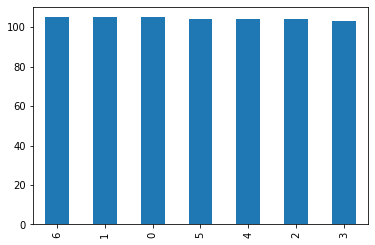

In [25]:
#checking distribution of data in each weekday
bs_data.weekday.value_counts().plot(kind='bar')

In [26]:
#converting the numbers into categorical values
bs_data['weekday']=bs_data['weekday'].map({0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',5:'Friday', 6:'Saturday'})

In [27]:
#creating dummy columns for weekday values,then merging new datafram weekday with bs_data season column and dropping weekday column
weekday=pd.get_dummies(bs_data['weekday'],drop_first=True)
bs_data=pd.concat([bs_data,weekday],axis=1)
bs_data=bs_data.drop('weekday',axis=1)
bs_data.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,2,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,2,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

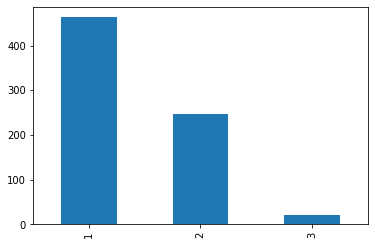

In [28]:
#checking distribution of data in each weathersit
bs_data.weathersit.value_counts().plot(kind='bar')

In [29]:
#converting the numbers into categorical values
bs_data['weathersit']=bs_data['weathersit'].map({1:'Clear',2:'Mist',3:'Light'})

In [30]:
#creating dummy columns for weathersit values,then merging new datafram weathersit with bs_data season column and dropping weathersit column
weathersit=pd.get_dummies(bs_data['weathersit'],drop_first=True)
bs_data=pd.concat([bs_data,weathersit],axis=1)
bs_data=bs_data.drop('weathersit',axis=1)
bs_data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting into train and test

In [31]:
bs_train,bs_test=train_test_split(bs_data,train_size=0.7,random_state=100)

In [32]:
bs_test.shape

(220, 29)

# Lets start preparing data for model

In [33]:
bs_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Mist
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,16.0977,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Rescaling of variables

In [34]:
num_vars=['atemp','hum','windspeed','cnt']
scaler=MinMaxScaler()
bs_train[num_vars]=scaler.fit_transform(bs_train[num_vars])
bs_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### checking correlation of columns in heatmap

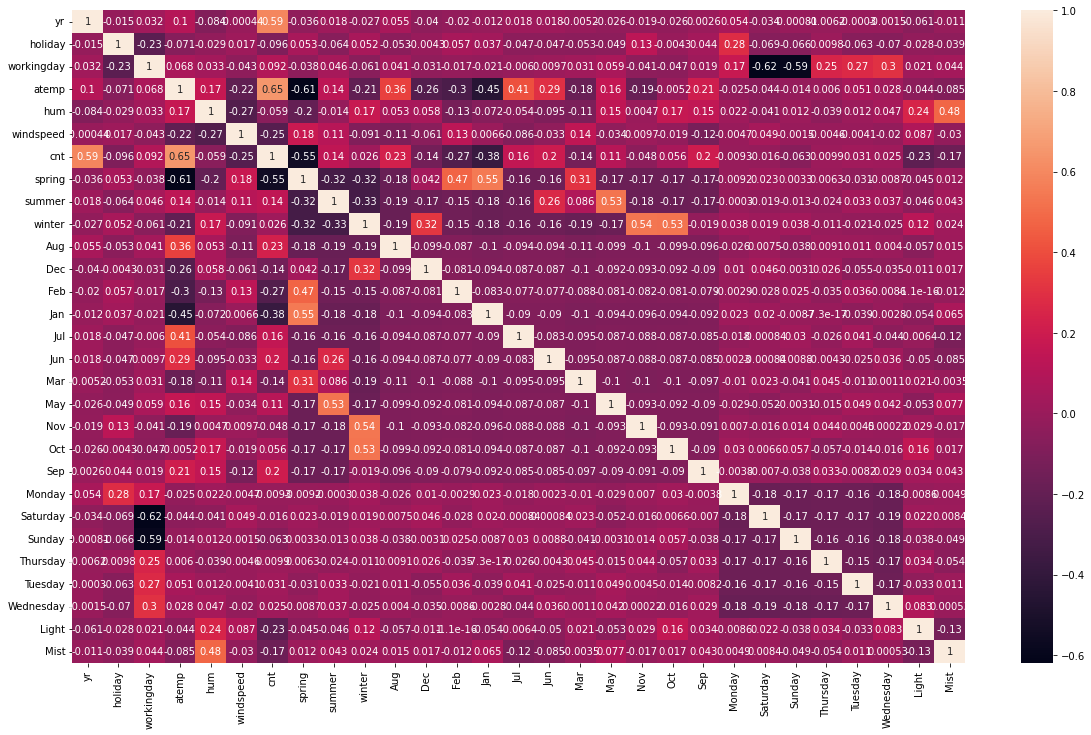

In [35]:
plt.figure(figsize=[20,12])
sns.heatmap(bs_train.corr(),annot=True)
plt.show()

# Training the model

## Using the Varaible selection method via RFE

In [36]:

y_train=bs_train.pop('cnt')
X_train=bs_train 
lm=LinearRegression()
#starting with selecting 20 variables
rfe=RFE(lm,n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 6),
 ('Jun', False, 2),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Monday', False, 4),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 7),
 ('Tuesday', False, 5),
 ('Wednesday', False, 8),
 ('Light', True, 1),
 ('Mist', True, 1)]

In [38]:
#dropping columns with support_ flag as False and selecting the True ones
col=X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Jul', 'Jun', 'Mar', 'Oct', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [39]:
#creating copy of exisiting training set
X_train_rfe=X_train[col]

In [40]:
# So creating the model and checking summary is an iterative process so lets create a function that we will be called when need.
def lr_model_summary(X,y):
    X=sm.add_constant(X)
    lr_model=sm.OLS(y,X).fit()
    print(lr_model.summary())
    return lr_model

In [41]:
#similarly creating function for calculating VIF
def get_vif(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    #print(vif)
    return vif

In [42]:
#creating first model
lr_model_summary(X_train_rfe,y_train)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.45e-186
Time:                        16:49:30   Log-Likelihood:                 519.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     490   BIC:                            -914.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2451      0.030      8.076      0.0

,Features,VIF
2,workingday,60.41
16,Saturday,14.49
17,Sunday,13.70
6,spring,6.04
3,atemp,4.32
8,winter,4.10
7,summer,3.80
1,holiday,3.38
12,Jan,2.36
4,hum,1.98


In [43]:
#the p value for holiday is highest. lets drop it first
X_train_rfe=X_train_rfe.drop('holiday',axis=1)
lr_model_summary(X_train_rfe,y_train)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.45e-186
Time:                        16:49:31   Log-Likelihood:                 519.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     490   BIC:                            -914.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2494      0.045      5.486      0.0

,Features,VIF
3,hum,35.24
2,atemp,20.48
1,workingday,19.22
5,spring,6.37
15,Saturday,5.14
4,windspeed,4.97
16,Sunday,4.88
7,winter,4.69
6,summer,4.08
11,Jan,2.40


In [44]:
# hum has highest VIF, so dropping it.
X_train_rfe=X_train_rfe.drop('hum',axis=1)
lr_model_summary(X_train_rfe,y_train)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     146.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.08e-184
Time:                        16:49:31   Log-Likelihood:                 511.26
No. Observations:                 510   AIC:                            -984.5
Df Residuals:                     491   BIC:                            -904.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1791      0.043      4.206      0.0

,Features,VIF
1,workingday,17.80
2,atemp,13.24
4,spring,5.63
3,windspeed,4.89
14,Saturday,4.86
15,Sunday,4.50
6,winter,3.89
5,summer,3.68
10,Jan,2.30
0,yr,2.09


In [45]:
#May column has highest p -value so dropping it.
X_train_rfe=X_train_rfe.drop('May',axis=1)
lr_model_summary(X_train_rfe,y_train)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     155.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.60e-185
Time:                        16:49:31   Log-Likelihood:                 510.59
No. Observations:                 510   AIC:                            -985.2
Df Residuals:                     492   BIC:                            -909.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1728      0.042      4.092      0.0

,Features,VIF
1,workingday,17.70
2,atemp,12.95
4,spring,5.60
13,Saturday,4.82
3,windspeed,4.82
14,Sunday,4.47
6,winter,3.88
5,summer,3.05
10,Jan,2.30
0,yr,2.08


In [46]:
#working day has highest VIF. so dropping it.
X_train_rfe=X_train_rfe.drop('workingday',axis=1)
lr_model_summary(X_train_rfe,y_train)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     160.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.25e-183
Time:                        16:49:31   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     493   BIC:                            -903.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2627      0.034      7.810      0.0

,Features,VIF
1,atemp,5.15
2,windspeed,4.61
3,spring,4.46
5,winter,3.15
4,summer,2.43
9,Jan,2.20
0,yr,2.07
8,Feb,1.88
10,Nov,1.80
6,Aug,1.71


In [47]:
#Saturday has p value > 0.05. so dropping it.
X_train_rfe=X_train_rfe.drop('Saturday',axis=1)
lr_model_summary(X_train_rfe,y_train)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     170.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.88e-184
Time:                        16:49:31   Log-Likelihood:                 503.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     494   BIC:                            -907.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2653      0.034      7.904      0.0

,Features,VIF
1,atemp,5.11
2,windspeed,4.59
3,spring,4.44
5,winter,3.14
4,summer,2.43
9,Jan,2.20
0,yr,2.07
8,Feb,1.88
10,Nov,1.80
6,Aug,1.70


# Model 1

In [48]:
#all p values are less than 0.05. dropping atemp as its vif> 5.
X_train_rfe=X_train_rfe.drop('atemp',axis=1)
lr_model_summary(X_train_rfe,y_train)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     143.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          6.27e-164
Time:                        16:49:32   Log-Likelihood:                 452.10
No. Observations:                 510   AIC:                            -874.2
Df Residuals:                     495   BIC:                            -810.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5833      0.016     35.952      0.0

,Features,VIF
2,spring,4.41
1,windspeed,3.96
4,winter,2.98
8,Jan,2.17
3,summer,2.14
0,yr,1.88
7,Feb,1.86
9,Nov,1.79
13,Mist,1.58
6,Dec,1.54


# Model 2

In [49]:
#We can see atemp is correlated with Sep and Aug. So lets drop AUg and Sep and add atemp
X_train_rfe1=X_train_rfe
X_train_rfe1['atemp']=X_train['atemp']
X_train_rfe1=X_train_rfe1.drop(['Sep','Aug'],axis=1)
lr_model_summary(X_train_rfe1,y_train)
get_vif(X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.3
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          8.88e-182
Time:                        16:49:32   Log-Likelihood:                 491.94
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     496   BIC:                            -896.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3198      0.032     10.031      0.0

,Features,VIF
1,windspeed,4.55
2,spring,4.12
12,atemp,3.67
4,winter,2.84
7,Jan,2.19
0,yr,2.07
6,Feb,1.87
3,summer,1.81
8,Nov,1.78
11,Mist,1.55


# Model 3

In [50]:
#dropping summer as summer p-value has increased
X_train_rfe1=X_train_rfe1.drop('summer',axis=1)
lr_model_summary(X_train_rfe1,y_train)
get_vif(X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          7.90e-183
Time:                        16:49:32   Log-Likelihood:                 491.67
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     497   BIC:                            -902.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3328      0.026     12.694      0.0

,Features,VIF
1,windspeed,3.90
2,spring,3.73
11,atemp,3.63
3,winter,2.56
6,Jan,2.19
0,yr,2.06
5,Feb,1.87
7,Nov,1.78
4,Dec,1.54
10,Mist,1.51


# Model 4

In [51]:
# so the R-squared has been increased and Vif of atemp is under 5. so lets analyze other columns with their correlation

#We can see spring is correlated with Feb ,Jan and Mar. So lets drop Jan and Feb
X_train_rfe1=X_train_rfe1.drop(['Jan','Feb'],axis=1)
lr_model_summary(X_train_rfe1,y_train)
get_vif(X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.3
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.52e-181
Time:                        16:49:32   Log-Likelihood:                 482.48
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2956      0.025     11.764      0.0

,Features,VIF
1,windspeed,3.88
9,atemp,3.58
3,winter,2.50
0,yr,2.05
5,Nov,1.76
2,spring,1.67
8,Mist,1.50
4,Dec,1.41
6,Sunday,1.17
7,Light,1.09


# Model 5 

In [52]:
# so the R-squared has been increased and Vif of atemp is under 5. so lets analyze other columns with their correlation

#We can see winter is correlated with Nov ,Dec and Oct. So lets drop Nov and Dec
X_train_rfe1=X_train_rfe1.drop(['Nov','Dec'],axis=1)
lr_model_summary(X_train_rfe1,y_train)
get_vif(X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     284.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          7.64e-181
Time:                        16:49:32   Log-Likelihood:                 475.55
No. Observations:                 510   AIC:                            -933.1
Df Residuals:                     501   BIC:                            -895.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2753      0.025     11.113      0.0

,Features,VIF
1,windspeed,3.83
7,atemp,3.55
0,yr,2.05
2,spring,1.62
6,Mist,1.49
3,winter,1.36
4,Sunday,1.17
5,Light,1.08


## Here we observer that R-squared has decreased. So we can include the Nov, Dec, Jan, Feb column and choose Model 3 (after dropping summer column) as final model.

In [53]:
X_train_rfe1['Jan']=X_train['Jan']
X_train_rfe1['Feb']=X_train['Feb']
X_train_rfe1['Nov']=X_train['Nov']
X_train_rfe1['Dec']=X_train['Dec']
lr=lr_model_summary(X_train_rfe1,y_train)
get_vif(X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          7.90e-183
Time:                        16:49:32   Log-Likelihood:                 491.67
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     497   BIC:                            -902.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3328      0.026     12.694      0.0

,Features,VIF
1,windspeed,3.90
2,spring,3.73
7,atemp,3.63
3,winter,2.56
8,Jan,2.19
0,yr,2.06
9,Feb,1.87
10,Nov,1.78
11,Dec,1.54
6,Mist,1.51


## Residual Analysis

c:\users\girleffect\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


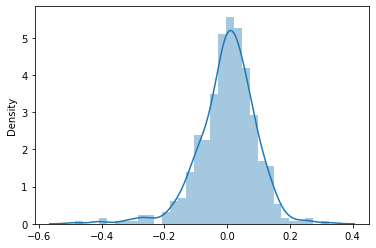

In [54]:
X_train_rfe1=sm.add_constant(X_train_rfe1)
y_train_pred=lr.predict(X_train_rfe1)
res=y_train-y_train_pred
sns.distplot(res)
plt.show()

### we observer in above plot that residual are uniformly distributed and mean is 0.

## Making predictions on test data

In [55]:
X_train_rfe1.columns

Index(['const', 'yr', 'windspeed', 'spring', 'winter', 'Sunday', 'Light',
       'Mist', 'atemp', 'Jan', 'Feb', 'Nov', 'Dec'],
      dtype='object')

In [56]:
bs_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Light', 'Mist'],
      dtype='object')

In [57]:
num_vars=['atemp','hum','windspeed','cnt']
bs_test[num_vars]=scaler.transform(bs_test[num_vars])
bs_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
y_test=bs_test.pop('cnt')
X_test=bs_test
X_test_sm=sm.add_constant(X_test)
X_test_new=X_test_sm[X_train_rfe1.columns]
y_test_pred=lr.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

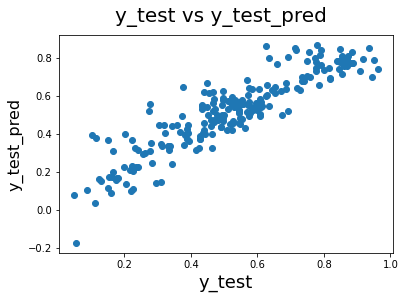

In [59]:
fig=plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_test_pred',fontsize=16)

In [60]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.830615199640373

In [61]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8171145203920747

## The R-squared on train and test data are almost similar. We can conclude that our model is better are predicting the cnt variable

## the final linear equation will be 

##  cnt= 0.2371 * yr - 0.1541 * windspeed - 0.0978 * spring + 0.0643 * winter - 0.0494 * sunday - 0.2923 * light -0.0772 * mist + 0.3600 * atemp - 0.0743 * Nov - 0.0776 * Dec -0.0931 * Jan -0.0542 * Feb + 0.3328

### Top  attributes contributing significantly in descending order
### atemp
### weathersit (light,mist)
### yr
### windspeed
### season(spring,winter)
### Month(Nov,Dec, Jan, Feb)
### weekday(sunday)
